In [1]:
#Loading the dependent utils fucntion and the model
from utils import *
from model import *
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.optim as optim
from torch.utils.data import DataLoader

In [3]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_properties(0))

2.0.0+cu117
11.7
8500
NVIDIA GeForce RTX 2050
_CudaDeviceProperties(name='NVIDIA GeForce RTX 2050', major=8, minor=6, total_memory=4095MB, multi_processor_count=16)


In [4]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda")
print("CUDA Available?", cuda)

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

#Load MNIST training data with transformations

train_data = datasets.MNIST('../data',train = True,download=True,transform=train_transforms)
test_data = datasets.MNIST('../data',train = False,download=True,transform=test_transforms)


CUDA Available? True


In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomApply(
               p=0.1
               CenterCrop(size=(22, 22))
           )
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [6]:
batch_size = 128 

kwargs = {'batch_size': batch_size,'shuffle':True,'num_workers':4,'pin_memory':True}

train_loader = DataLoader(train_data,**kwargs)
test_loader = DataLoader(test_data,**kwargs)

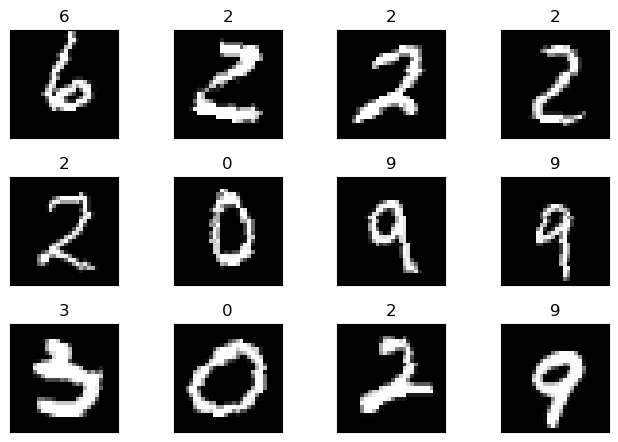

In [7]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_loss, train_accuracy = train(model, device, train_loader, optimizer,train_acc)
    test_loss, test_accuracy = test(model, device, test_loader,test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0893 Batch_id=468 Accuracy=76.84: 100%|██████████| 469/469 [00:16<00:00, 29.13it/s]


Test set: Average loss: 0.0747, Accuracy: 9771/10000 (97.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0394 Batch_id=468 Accuracy=96.79: 100%|██████████| 469/469 [00:14<00:00, 31.57it/s]


Test set: Average loss: 0.0447, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0170 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:15<00:00, 30.01it/s]


Test set: Average loss: 0.0404, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0207 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:14<00:00, 31.54it/s]


Test set: Average loss: 0.0273, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0252 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:15<00:00, 31.21it/s]


Test set: Average loss: 0.0256, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0377 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:14<00:00, 31.99it/s]


Test set: Average loss: 0.0235, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0169 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]


Test set: Average loss: 0.0260, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0037 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:29<00:00, 15.98it/s]


Test set: Average loss: 0.0222, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0169 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:29<00:00, 15.72it/s]


Test set: Average loss: 0.0195, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0747 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:35<00:00, 13.34it/s]


Test set: Average loss: 0.0192, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0193 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:31<00:00, 14.72it/s]


Test set: Average loss: 0.0199, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0303 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:33<00:00, 14.04it/s]


Test set: Average loss: 0.0178, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0183 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:42<00:00, 11.08it/s]


Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0072 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:39<00:00, 11.87it/s]


Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0098 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:31<00:00, 14.72it/s]


Test set: Average loss: 0.0261, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0117 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:42<00:00, 11.02it/s]


Test set: Average loss: 0.0170, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0015 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:29<00:00, 15.84it/s]


Test set: Average loss: 0.0168, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0099 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]


Test set: Average loss: 0.0166, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0310 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:42<00:00, 11.02it/s]


Test set: Average loss: 0.0162, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0025 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:51<00:00,  9.14it/s]


Test set: Average loss: 0.0162, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.


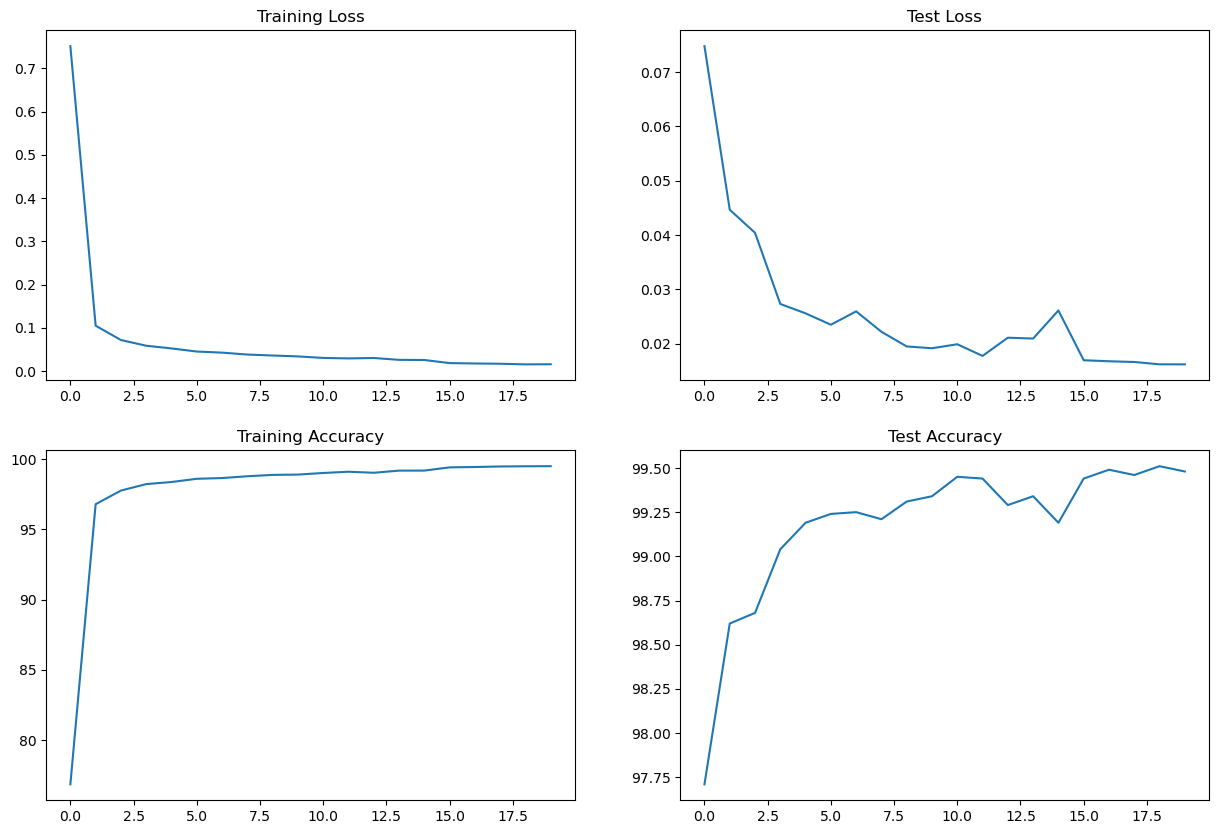

In [9]:
from utils import loss_plots
loss_plots(train_losses,train_acc,test_losses,test_acc)

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
